In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(func.max(measurement.date)).all()[0][0]
last_date = dt.datetime.strptime(last_date,"%Y-%m-%d")

# Calculate the date 1 year ago from the last data point in the database
prior_year = last_date-dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
prcp_result = session.query(measurement.date,measurement.prcp).filter(measurement.date>=prior_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_result_df = pd.DataFrame(prcp_result).set_index('date')
prcp_result_df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


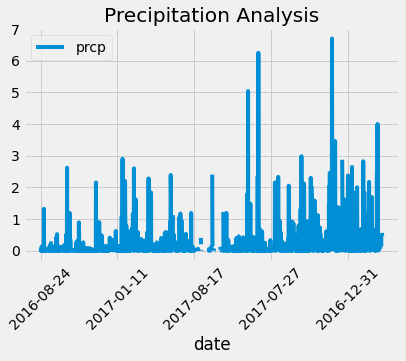

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_result_df.plot(rot = 45)
plt.title("Precipitation Analysis")
# plt.savefig("precipitation_plot.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_result_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(station.station))
station_count = stations[0]
station_count

(9)

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.tobs))\
                    .group_by(measurement.station).order_by(func.count(measurement.tobs).desc())
for station in active_stations:
        print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = active_stations[0][0]

average_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active)
averages_list = list(average_stats)
print(averages_list)

[(54.0, 85.0, 71.66378066378067)]


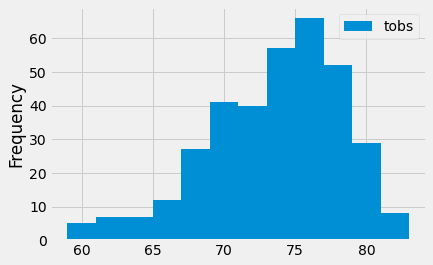

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs = session.query(measurement.tobs).filter(measurement.date>=prior_year)\
.filter(measurement.date<=last_date)\
.filter(measurement.station==most_active)

tobs_list=[]
for tob in tobs:
        tobs_list.append(tob[0])
        
plt.hist(tobs_list, bins=12, label='tobs')
plt.ylabel('Frequency')
plt.legend(loc=1)
plt.show()